In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.DESCR) #https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.data.shape
iris.target.shape
iris.target_names #dtype='<U10' - элементы - строки длиной не более 10 символов
iris.feature_names
#print(iris.target)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для удобства работы создадим коллекцию DataFrame по нашим данным

In [8]:

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=[iris.target_names[i] for i in iris.target]
iris_df.head()
iris_df.describe() #вычисляем характеристики данных

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Визуализируем данные

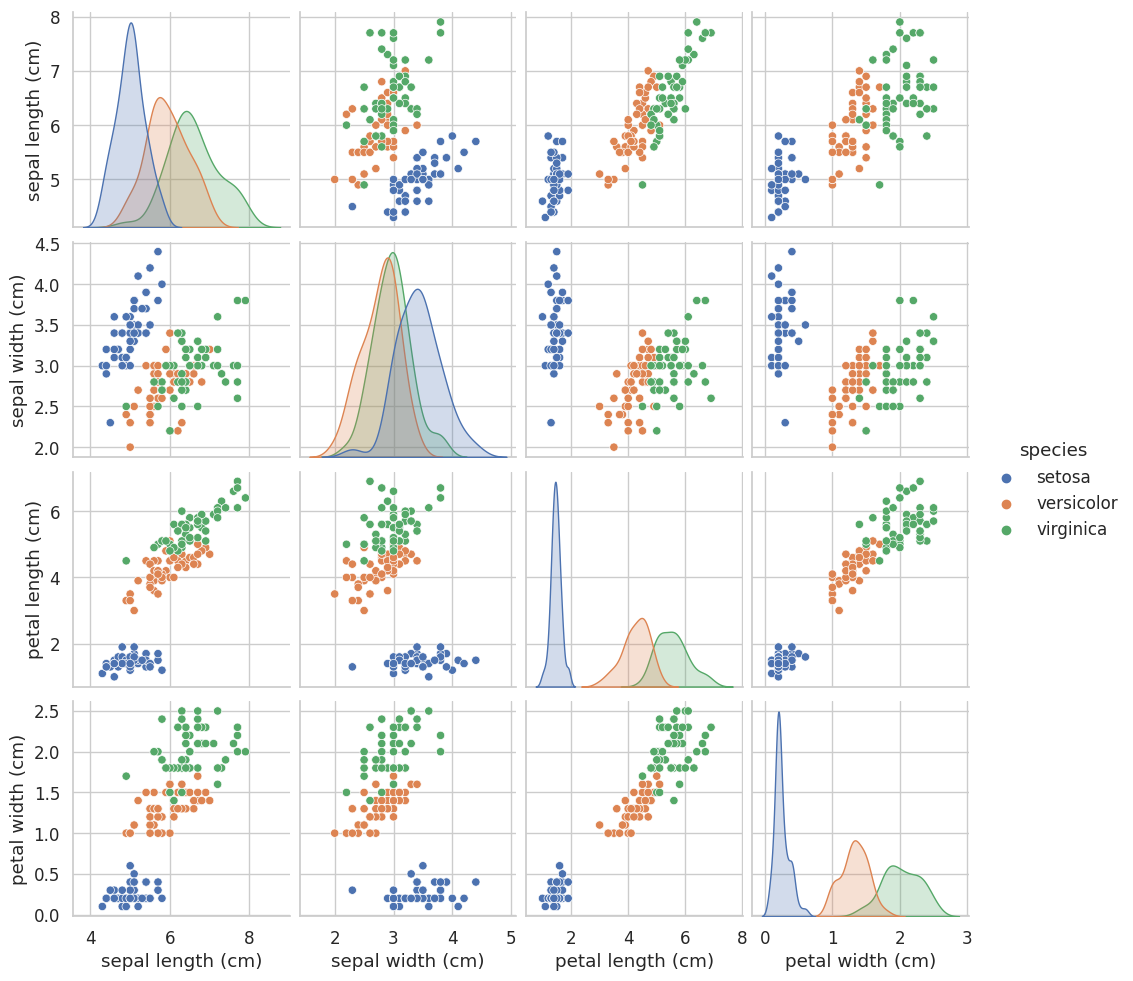

In [9]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid=sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species') #vars - последовательность с именами переменных, наносимых на диаграмму (тут это имена первых столбцов); hue - столбец коллекции DataFrame, используемый для определения цветов, наносимых на диаграмму

In [14]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(iris.data)
print(kmeans.labels_[0:50])
print(kmeans.labels_[50:100])
print(kmeans.labels_[100:150])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 3 2 2 2 3 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 2 2 2 3 3 3 3 2 3 2 2
 2 3 3 3 2 3 3 3 3 3 2 3 3]
[4 2 0 4 4 0 3 0 4 0 4 4 4 2 4 4 4 0 0 2 4 2 0 2 4 0 2 2 4 0 0 0 4 2 2 0 4
 4 2 4 4 4 2 4 4 4 2 4 4 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Посмотрим результат на 2D с использованием PCA

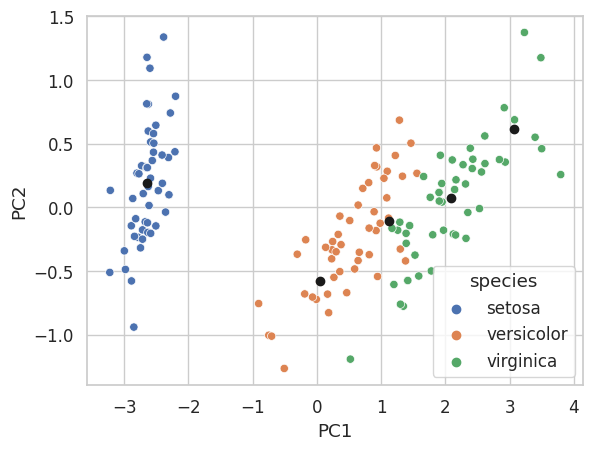

In [15]:
pca=PCA(n_components=2)
pca.fit(iris.data)
iris_pca=pca.transform(iris.data)

iris_pca_df=pd.DataFrame(iris_pca, columns=['PC1','PC2'])
iris_pca_df['species']=iris_df.species

#то же делаем с центроидами кластеров
iris_centers=pca.transform(kmeans.cluster_centers_)

axes=sns.scatterplot(data=iris_pca_df, x='PC1', y='PC2', hue='species',legend='brief')
plt.scatter(iris_centers[:,0], iris_centers[:,1],c='k')



Попробуем выбирать оптимальное число кластеров с помощью SSE "ПРАВИЛО ЛОКТЯ"

1
681.3706
2
152.3479517603579
3
78.851441426146
4
57.22847321428572
5
46.446182051282065
6
39.03998724608726
7
34.29971212121213
8
29.988943950786055
9
27.86291131237185
10
26.212366798914285


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

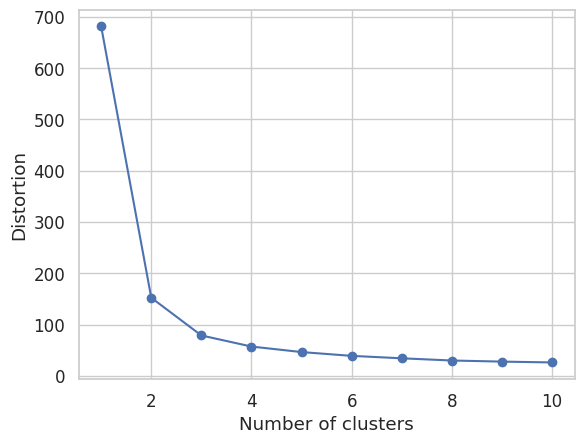

In [16]:
distortions=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(iris.data)
  distortions.append(kmeans.inertia_)
  print(i)
  print(kmeans.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [ ]:
dbscan=DBSCAN(eps=1.1,min_samples=5,metric='euclidean')
dbscan.fit(iris.data)
print(dbscan.labels_)
print(dbscan.labels_[0:50])
print(dbscan.labels_[50:100])
print(dbscan.labels_[100:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
